# Deep Learning

![dog-cat](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/dog-cat.png)

Deep learning is a subfield of machine learning that focuses on neural networks with many layers, also known as deep neural networks (DNNs). These networks can learn complex patterns and representations from large amounts of data, enabling them to solve a wide variety of tasks, such as image and speech recognition, natural language processing, and playing games. Deep learning has been responsible for numerous breakthroughs in artificial intelligence over the past decade.

There are several key deep learning algorithms and architectures, including:

- Feedforward Neural Networks (FNNs): These are the most basic type of neural network, with connections only going in one direction, from input to output. They consist of multiple layers of neurons, including input, hidden, and output layers.

- Convolutional Neural Networks (CNNs): CNNs are designed to process grid-like data, such as images, by using convolutional layers that can automatically learn to detect local patterns, like edges or textures. They are widely used in computer vision tasks, such as image recognition and object detection.

- Recurrent Neural Networks (RNNs): RNNs are designed to process sequential data, such as time series or natural language, by maintaining a hidden state that can capture information from previous time steps. They can learn to model dependencies over time, making them well-suited for tasks like language modeling and speech recognition.

- Long Short-Term Memory (LSTM) Networks: LSTMs are a specific type of RNN that can learn long-term dependencies more effectively. They use a special gating mechanism to control the flow of information, which helps prevent the vanishing or exploding gradient problems common in traditional RNNs.

- Gated Recurrent Units (GRUs): GRUs are another type of RNN that also address the vanishing gradient problem, using a simpler gating mechanism than LSTMs. They often perform similarly to LSTMs but with fewer parameters, making them more computationally efficient.

- Autoencoders (AEs): AEs are unsupervised learning algorithms that learn to encode input data into a lower-dimensional representation and then reconstruct the original data from that representation. They can be used for tasks such as dimensionality reduction, denoising, and feature extraction.

- Variational Autoencoders (VAEs): VAEs are a type of generative model that combine ideas from autoencoders and probabilistic graphical models. They learn to encode data into a probabilistic latent space and can generate new samples by sampling from that space.

- Generative Adversarial Networks (GANs): GANs consist of two neural networks, a generator and a discriminator, that are trained together in a game-theoretic setting. The generator learns to create realistic data samples, while the discriminator learns to distinguish between real and generated samples. GANs have been used to generate high-quality images, videos, and other types of data.

- Transformer Networks: Transformers are a type of neural network architecture primarily used for natural language processing tasks. They rely on self-attention mechanisms to process input sequences, allowing them to learn long-range dependencies more effectively than RNNs. Transformers have led to state-of-the-art results in various NLP tasks, such as machine translation and text summarization.

These algorithms represent some of the major deep learning approaches, but there are many other variations and specialized architectures developed for specific tasks or domains.

## When to use deep learning

Deep learning, specifically deep neural networks, should be considered over other machine learning techniques or shallow networks under certain conditions:

1. **When there is no clear algorithmic solution**.
1. Availability of large amounts of data: Deep learning models are particularly effective when trained on large amounts of data, as they can learn complex patterns and representations. If you have access to a large, labeled dataset, deep learning models may be more likely to outperform traditional machine learning methods.

2. High-dimensional or complex data: Deep learning models excel at handling high-dimensional data, such as images, audio, or natural language. They can automatically learn hierarchical feature representations, making them suitable for tasks like image classification, speech recognition, or natural language processing.

3. Need for end-to-end learning: Deep learning models can be trained end-to-end, learning to map raw input data to desired outputs without the need for manual feature engineering. This can simplify the development process and improve performance in cases where domain-specific knowledge is limited or difficult to incorporate.

4. Computational resources: Deep learning models can require significant computational resources, particularly during training. However, if you have access to powerful hardware, such as GPUs or TPUs, deep learning models can be trained more efficiently and may yield better performance.

5. Transfer learning: Deep learning models can benefit from transfer learning, which involves pretraining a model on a large dataset and then fine-tuning it on a smaller, task-specific dataset. This can lead to faster training times and better performance, particularly when the available data for your specific task is limited.

6. Non-linear and complex relationships: Deep learning models can automatically learn non-linear and complex relationships within the data. If your problem involves data with intricate patterns or relationships that are difficult to model using traditional machine learning techniques, deep learning might be a better fit.


It's important to note that deep learning is not always the best choice for every problem. In cases where the dataset is small, the relationships between features and targets are relatively simple, or the available computational resources are limited, traditional machine learning methods or shallow networks might be more suitable. It is often a good idea to try multiple approaches and compare their performance before deciding on the most appropriate technique for your specific problem.

## Regression

Regression is a supervised learning technique. There are three types of regression:
- Linear regression, used to predict a continuous value, such as a house price, based on an input variable, such as square footage.
- Poisson's regression, used to predict a count, such as the number of times a person will visit a website, based on an input variable, such as the number of times a person has visited the website.
- Logistic regression, used to predict a class, typically binary value, such as whether a person has a disease, based on an input variable, such as age.

## Linear Regression

We will use  linear regression to introduce some machine learning concepts. We will build a model. A model is a mathematical function that takes one or more inputs and produces one or more output, in an effort to simulate a real-world process.

In this case, we will use a model to predict the price of a house based on its size. We will use the following data set to train our model:



In [366]:
import pandas as pd

url = "https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/data/prices-size.csv"
data = pd.read_csv(url)
# data.drop('House', axis=1, inplace=True)
data

,Taxes,Bedrooms,Baths,Quadrant,NW,price,size,lot
0,1360,3,2.0,NW,1,145000,1240,18000
1,1050,1,1.0,NW,1,68000,370,25000
2,1010,3,1.5,NW,1,115000,1130,25000
3,830,3,2.0,SW,0,69000,1120,17000
4,2150,3,2.0,NW,1,163000,1710,14000
...,...,...,...,...,...,...,...,...
95,990,2,2.0,NW,1,176000,1060,27500
96,3030,3,2.0,SW,0,196500,1730,47400
97,1580,3,2.0,NW,1,132200,1370,18000
98,1770,3,2.0,NE,0,88400,1560,12000


In [297]:
data.describe()

,Taxes,Bedrooms,Baths,NW,price,size,lot
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1668.200000,2.990000,1.890000,0.750000,126698.000000,1526.300000,19417.000000
std,1009.280552,0.658971,0.515321,0.435194,56356.774718,557.116775,8524.309327
min,20.000000,1.000000,1.000000,0.000000,21000.000000,370.000000,3500.000000
25%,970.000000,3.000000,1.875000,0.750000,86875.000000,1157.500000,12875.000000
50%,1535.000000,3.000000,2.000000,1.000000,123750.000000,1410.000000,18000.000000
75%,2042.500000,3.000000,2.000000,1.000000,153075.000000,1760.000000,25000.000000
max,4900.000000,5.000000,3.000000,1.000000,338000.000000,4050.000000,47400.000000


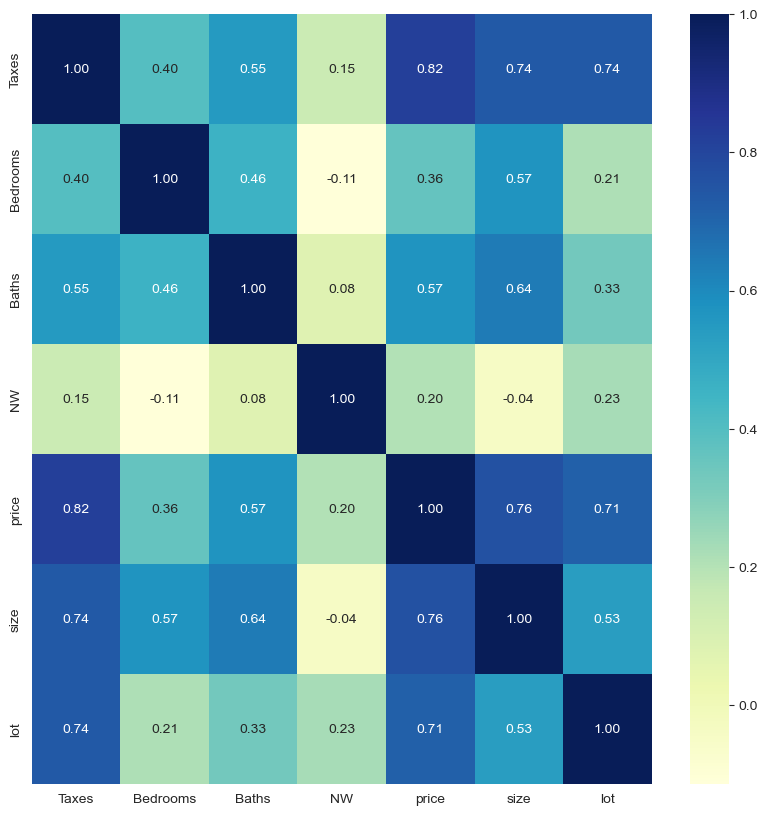

In [349]:
# show data correlation chart with matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap="YlGnBu")
plt.show()



<Axes: title={'center': 'Price vs Size'}, xlabel='Size (sq ft)', ylabel='Price ($)'>

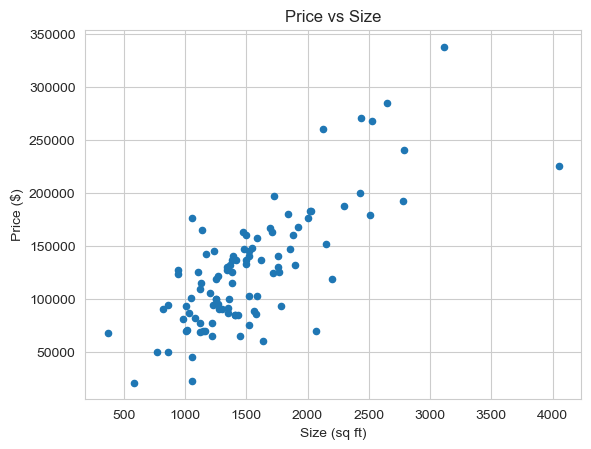

In [350]:
def plot_points():
    points_plt = data.plot.scatter(x='size', y='price')
    points_plt.set_title('Price vs Size')
    points_plt.set_xlabel('Size (sq ft)')
    points_plt.set_ylabel('Price ($)')
    return points_plt


plot_points()

## Linear Regression

We can draw the line that best fits the data. The line is called a **regression line**.  There is a formula to determine the line. The formula is called the **least squares method**.

Slope:

$m = \frac{N \sum(xy) - \sum(x) \sum(y)}{N \sum(x^2) - (\sum(x))^2}$

Intercept:

$b = \frac{\sum(y) - m \sum(x)}{N}$

The formulas are provided for information only and works for a model with 1 input and 1 output. This will not generalize to a model with multiple inputs and outputs, so we will not use the formulas in the future. Rather, we will develop a method to determine the line that best fits the data and will later generalize to multiple inputs and outputs.



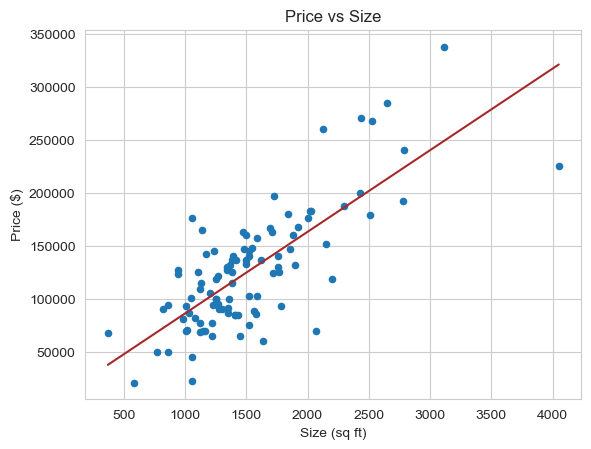

In [305]:
import numpy as np

plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')


In [374]:
from sklearn.linear_model import LinearRegression

prices = data['price'].values.reshape(-1, 1)
sizes = data['size'].values.reshape(-1, 1)

linear_regressor = LinearRegression()
linear_regressor.fit(sizes, prices)
y_hat = linear_regressor.predict(np.array([[2500]]))
print('Predicted 2500 sq ft house price: $%.2f' % y_hat)
y2_hat = linear_regressor.predict(np.array([[3500]]))
print('Predicted 3500 sq ft house price: $%.2f' % y2_hat)

print('Slope: %.2f' % linear_regressor.coef_)
print('Intercept: %.2f' % linear_regressor.intercept_)


Predicted 2500 sq ft house price: $201680.39
Predicted 3500 sq ft house price: $278688.08
Slope: 77.01
Intercept: 9161.16


## Devising a model without a formula

How can we tell which line is the best, or the most accurate, to model the sample data, without eyeballing the data.

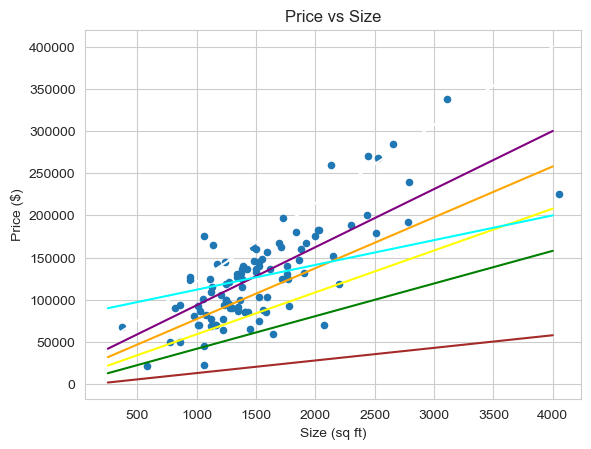

In [351]:
plot = plot_points()

plot.plot([250, 4000], [2000, 58000], color='brown')
plot.plot([250, 4000], [13000, 158000], color='green')
plot.plot([250, 4000], [22000, 208000], color='yellow')
plot.plot([250, 4000], [32000, 258000], color='orange')
plot.plot([250, 4000], [42000, 300000], color='purple')
plot.plot([250, 4000], [52000, 400000], color='white')
plot.plot([250, 4000], [90000, 200000], color='cyan')



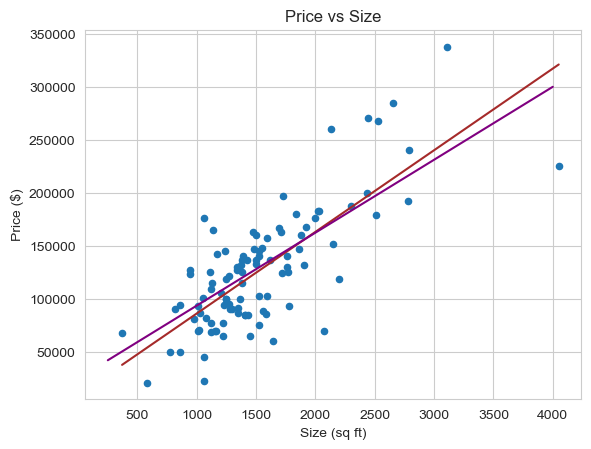

In [352]:
plot = plot_points()

plot.plot(np.unique(data['size']), np.poly1d(np.polyfit(data['size'], data['price'], 1))(np.unique(data['size'])),
          color='brown')
plot.plot([250, 4000], [42000, 300000], color='purple')

[]

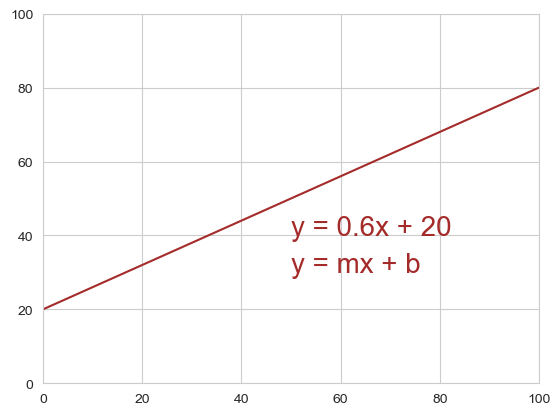

In [309]:
import matplotlib.pyplot as plt

x1, y1 = [0, 100], [20, 80]
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.plot(x1, y1, color='brown')
plt.text(50, 40, 'y = 0.6x + 20', fontsize=20, color='brown')
plt.text(50, 30, 'y = mx + b', fontsize=20, color='brown')
plt.plot()

You can think of this as a function $f(x) = y$. $f$ predicts price $y$ given input square footage $x$. The function is a line, and the line is defined by the slope $m$ and the y-intercept $b$.

In machine learning terms, we rename the variables as follows:
- $x$ is the input variable (independent variable). In neural networks and other classification applications, we call this a **feature**. Square footage is a feature.
- $y$ is the output variable (dependent variable). In neural networks and other classification applications, we call this a **class** or a **label**. Price is a label. In a regression setting, we call the output variable a **target** or **response** or **prediction**, and label it $\hat{y}$.
- $m$ is the slope of the line. In machine learning, we call this the **weight**, and number it, such as $w_1$.
- $b$ is the y-intercept of the line. In machine learning, we call this the **bias**, and number it, such as $b_1$.

The formula of the line becomes:

$\hat{y} = w_1 x_1 + b_1$

This formula will be seen again when we calculate the output of a neuron in a neural network.
For example, here is the intermediate output of a neuron with 3 inputs and 3 weights:
$\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b_1$

The number of **parameters** in a model is the number of weights and biases. In the example above, the number of parameters is 4. In our linear regression model which we seek to build to predict house prices based on square footage, the number of parameters is 2. By comparison,  Chat-GPT 3 has 175 billion parameters, and Chat-GPT 4 is rumored to have 1 trillion parameters.While we will not be working with a model this large, we will see a model to read handwritten digits (MNIST dataset) with over 1.3 million parameters.


## Accurately Measuring Error

We can measure the accuracy of the line by calculating the **mean squared error**. The mean squared error is the average of the squared differences between the predicted values and the actual values. The lower the mean squared error, the better the model.

The formula for the mean squared error is:
$MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2$

In machine learning, we use the term **loss** instead of error. The square of the difference is called the **L2 loss** in a machine learning context. There are many types of **loss functions** that could be used, especially for classification problems with more parameters.

### MSE Example

![MSE exercise](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/mse.png)

In the above chart:
- the loss for the point at $(1,2)$ is $0.6$
- the loss for the point at $(2,1)$ is $-0.8$
- the loss for the point at $(4.3)$ is $0.25$

The MSE is:

$\frac{1}{3} \times (0.6^2 + -0.8^2 + 0.25^2) = 0.354$

Plotting a bunch of random lines and calculating the mean squared error and selecting the lowest error will not converge to the best line, since there are an infinite number of lines that can be drawn. We need to use an **optimization algorithm** to find the best line. The optimization algorithm will start with a random line, and then iteratively improve the line by moving it in the direction of the steepest **descent**. The steepest descent is the direction of the greatest decrease in the loss function. The optimization algorithm will continue to move the line in the direction of the steepest descent until the loss function is minimized. We need a method that **converges** on the correct solution.


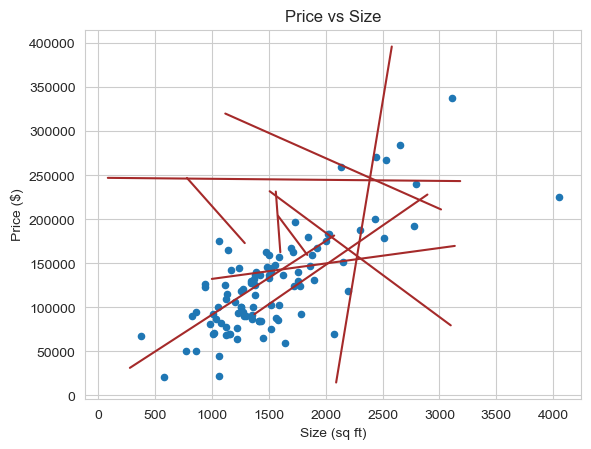

In [310]:
import random

plot = data.plot.scatter(x='size', y='price')
plot.set_title('Price vs Size')
plot.set_xlabel('Size (sq ft)')
plot.set_ylabel('Price ($)')
for i in range(10):
    plot.plot([random.uniform(0, 4000), random.uniform(0, 4000)],
              [random.uniform(0, 400000), random.uniform(0, 400000)], color='brown')

Mean squared error at m=50.000000: 4008103900.00


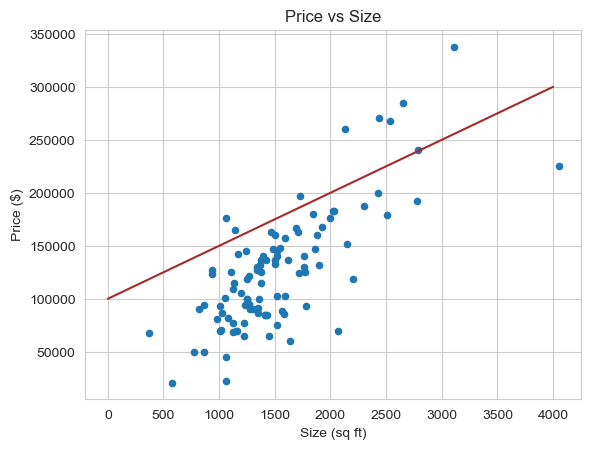

In [312]:
from sklearn.metrics import mean_squared_error

plot = plot_points()

b = 0
m = 0
plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
y = data['price'].values
y_hat = m * data['size'].values + b
loss = mean_squared_error(y, y_hat)
print('Mean squared error at m=%f: %.2f' % (m, loss))

Mean squared error at m=    0: 19196708400.00
Mean squared error at m=    5: 17092212875.00
Mean squared error at m=   10: 15119560700.00
Mean squared error at m=   15: 13278751875.00
Mean squared error at m=   20: 11569786400.00
Mean squared error at m=   25: 9992664275.00
Mean squared error at m=   30: 8547385500.00
Mean squared error at m=   35: 7233950075.00
Mean squared error at m=   40: 6052358000.00
Mean squared error at m=   45: 5002609275.00
Mean squared error at m=   50: 4084703900.00
Mean squared error at m=   55: 3298641875.00
Mean squared error at m=   60: 2644423200.00
Mean squared error at m=   65: 2122047875.00
Mean squared error at m=   70: 1731515900.00
Mean squared error at m=   75: 1472827275.00
Mean squared error at m=   80: 1345982000.00
Mean squared error at m=   85: 1350980075.00
Mean squared error at m=   90: 1487821500.00
Mean squared error at m=   95: 1756506275.00
Mean squared error at m=  100: 2157034400.00
Mean squared error at m=  105: 2689405875.00
Mean 

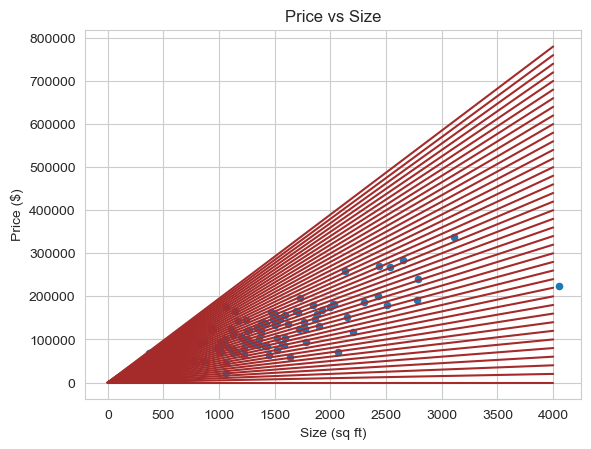

In [313]:
plot = plot_points()

b = 0
for m in range(0, 200, 5):
    plot.plot([0, 4000], [m * 0 + b, m * 4000 + b], color='brown')
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    print('Mean squared error at m=%5.0f: %.2f' % (m, loss))

Min loss: 1332160028.00 is at slope 82.00


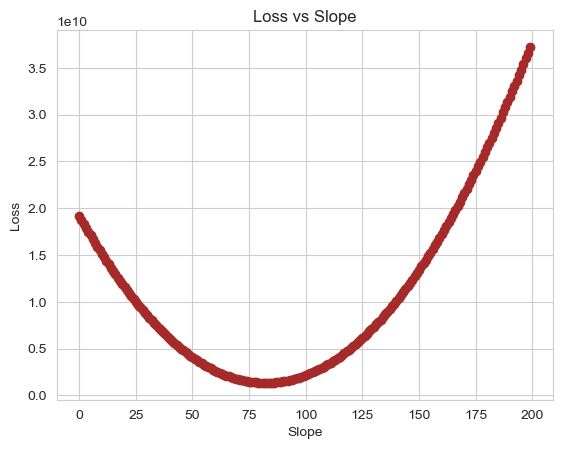

In [354]:
import sys

b = 0
min_slope = 0
min_loss = sys.float_info.max
for m in range(0, 200, 1):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(m, loss, 'o', color='brown')
    plt.title('Loss vs Slope')
    plt.xlabel('Slope')
    plt.ylabel('Loss')
print('Min loss: %.2f is at slope %.2f' % (min_loss, min_slope))

Min loss: 1329994428.00 is at intercept 0.00


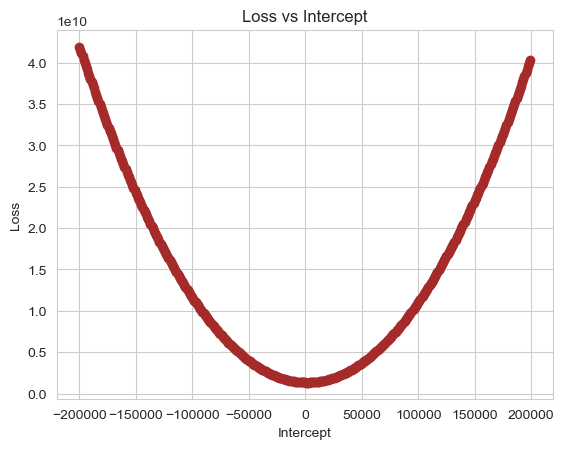

In [355]:
m = 82
min_b = 0
min_loss = sys.float_info.max
for b in range(-200000, 200000, 1000):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    loss = mean_squared_error(y, y_hat)
    if loss < min_loss:
        min_loss = loss
        min_slope = m
    plt.plot(b, loss, 'o', color='brown')
    plt.title('Loss vs Intercept')
    plt.xlabel('Intercept')
    plt.ylabel('Loss')
print('Min loss: %.2f is at intercept %.2f' % (min_loss, min_b))

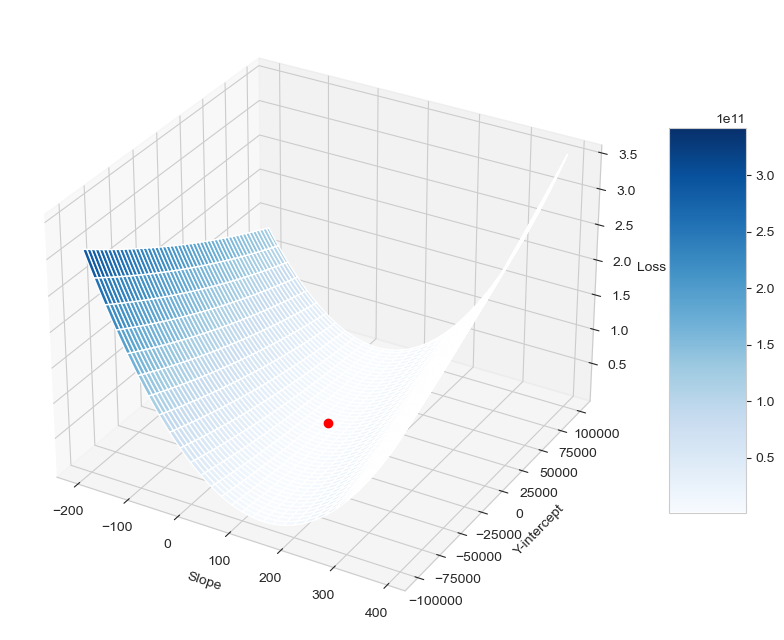

In [364]:
def error(m, b):
    y = data['price'].values
    y_hat = m * data['size'].values + b
    return mean_squared_error(y, y_hat)

m = np.arange(-200, 400, 10)
b = np.arange(-100_000, 100_000, 1_000)

M, B = np.meshgrid(m, b)
E = np.vectorize(error)(M, B)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.view_init(30, -60)
fig.colorbar(surface, shrink=0.5, aspect=5)
ax.plot3D([77], [9161], [error([77],[9161])], 'o', color='red')
# ax.plot3D([-100], [-75000], [error([-100],[-75000])], 'o', color='green')
# ax.plot3D([77], [-75000], [error([77],[-75000])], 'o', color='blue')



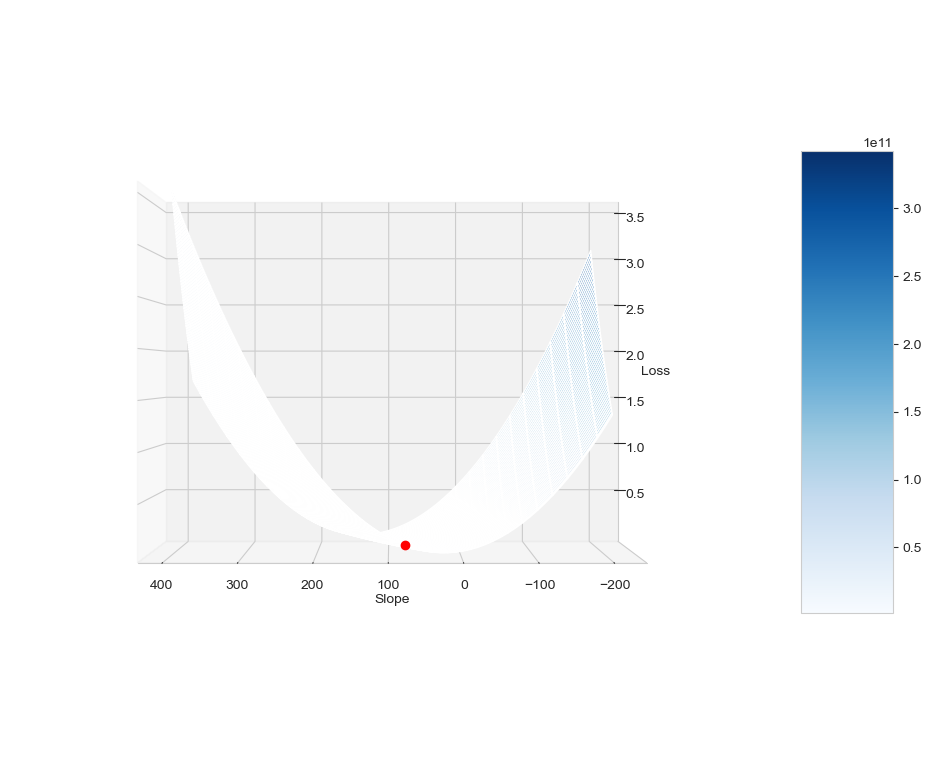

In [363]:
fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.set_xlabel('Slope')
ax.get_yaxis().set_ticks([])
ax.set_zlabel('Loss')
ax.plot3D([77], [9161], [min_loss], 'o', color='red')
ax.view_init(0, 90)  # slope vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

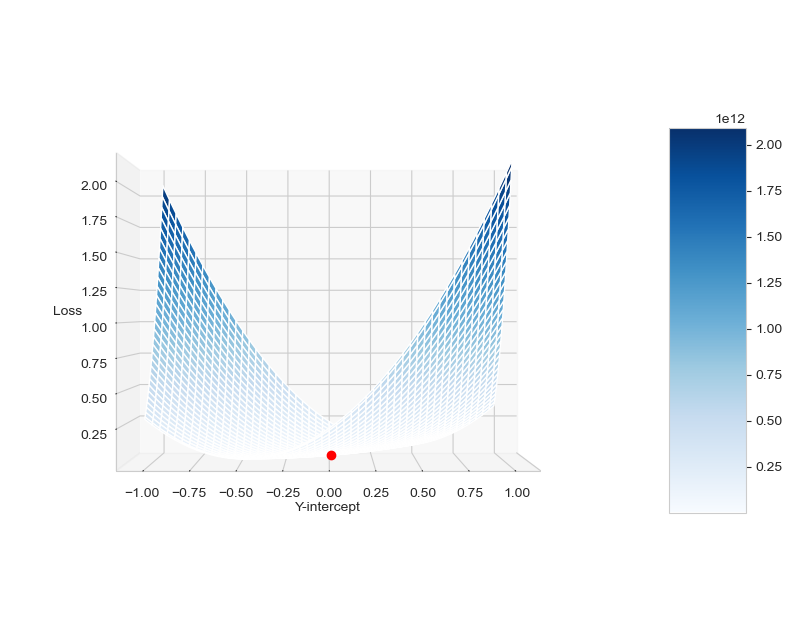

In [324]:

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = plt.subplot(projection='3d')
surface = ax.plot_surface(M, B, E, cmap="Blues")
ax.get_xaxis().set_ticks([])
ax.set_ylabel('Y-intercept')
ax.set_zlabel('Loss')
ax.plot3D([77], [8161], [min_loss], 'o', color='red')
ax.view_init(0, 0)  # y-intercept vs loss
fig.colorbar(surface, shrink=0.5, aspect=5)

## A complex loss landscape

https://www.cs.umd.edu/~tomg/projects/landscapes/

![loss landscape](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/noshort.png)

## A perceptron
![perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron.drawio.png)


Ignoring the **activation function** $\sigma$ for the moment, the output at $y$ is $x_1 \times w_1 + x_2 \times w_2 + ... +x_n \times w_n +b$, more concisely expressed as $b+\sum_{i=1}^n X_i \times W_i$.

## A perceptron with a single input

![single input perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron1.drawio.png)

Again ignoring the activation function, $y = w_1 \times x_1 + b $.

## Working with arrays


In [331]:
a = np.array([1, 2, 3, 4, 5])
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')

Array: [1 2 3 4 5]
Array shape: (5,)
Array type: int32


In [332]:
a = np.array([1, 2, 3, 4, 5], dtype=np.float32)
print(f'Array: {a}')
print(f'Array shape: {a.shape}')
print(f'Array type: {a.dtype}')
print(f'Mean: {a.mean()}')
print(f'Sum: {a.sum()}')
print(f'a *2.5 = {a * 2.5}')
b = np.array([0.1, 0.2, 0.3, 0.4, 0.5], dtype=np.float32)
print(f'b = {b}')
print(f'a + b = {a + b}')
print(f'a * b = {a * b}')
print(f'dot product = {np.dot(a, b)}')

Array: [1. 2. 3. 4. 5.]
Array shape: (5,)
Array type: float32
Mean: 3.0
Sum: 15.0
a *2.5 = [ 2.5  5.   7.5 10.  12.5]
b = [0.1 0.2 0.3 0.4 0.5]
a + b = [1.1 2.2 3.3 4.4 5.5]
a * b = [0.1        0.4        0.90000004 1.6        2.5       ]
dot product = 5.5


![perceptron](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/neuron.drawio.png)

Weights:
$\vec{w}= [w_1, w_2, ..., w_n]$

Inputs:
$\vec{x}= [x_1, x_2, ..., x_n]$

$b$ is the bias

$\vec{w} \cdot \vec{x} + b = \sum_{i=1}^n w_i \times x_i + b$

## Working with Tensors

In [333]:
import torch

a = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32, requires_grad=True)
print(f'Tensor a: {a}')
b = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5], dtype=torch.float32, requires_grad=True)
print(f'Tensor b: {b}')
c = torch.dot(a, b)
print(f'torch.dot(a, b) = {c}')


Tensor a: tensor([1., 2., 3., 4., 5.], requires_grad=True)
Tensor b: tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000], requires_grad=True)
torch.dot(a, b) = 5.5


In [334]:
x = torch.tensor(8.0, requires_grad=True)
print("x:", x)

x: tensor(8., requires_grad=True)


In [335]:
y = x ** 2 + 10
print("y:", y)

y: tensor(74., grad_fn=<AddBackward0>)


In [336]:
y.backward()
dx = x.grad
print("x.grad :", dx)


x.grad : tensor(16.)


$\frac{dy}{dx} = \frac{d (x^2 + 10 )}{dx} = 2x$


### Back Propagation

This is for information only, the only Calculus you need to know is the single line of code `loss.backward()`.

![computation-graph.drawio](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/computation-graph.drawio.png)



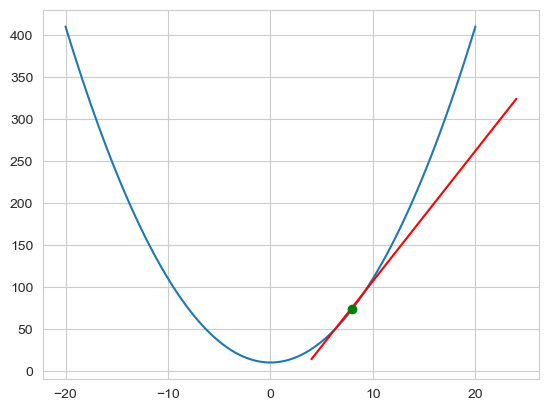

In [337]:
x = np.linspace(-20, 20, 100)
y = np.array([j * j + 10 for j in x])
plt.plot(x, y)
plt.plot([4, 24], [14, 324], color='red')
plt.plot(8, 74, 'o', color='green')


![NMIST number classification](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/nn.gif)


## Creating a model with PyTorch

1. Prepare the data
2. Define the model
3. Define the loss function
4. Define the optimizer
5. Train the model (loop):
    1. Make a prediction
    2. Calculate the loss
    3. Calculate the gradients
    4. Update the weights
6. Evaluate the model


In [ ]:
import torch

if torch.cuda.is_available():
    dev = "cuda:0"
else:
    dev = "cpu"
device = torch.device(dev)
print("Running on {}".format(dev))

In [ ]:

from torch.autograd import Variable
import torch.nn as nn

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)
        # nn.init.normal_(self.linear.weight, mean=10, std=1.0)
        # nn.init.normal_(self.linear.bias, mean=1000, std=1.0)

    def forward(self, x):
        return self.linear(x)


model = LR()
if torch.cuda.is_available():
    model.cuda()

torch.nn.init.normal_(model.linear.weight)

epochs = 801
loss_function = torch.nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

print('start: weight {} bias {}'.format(model.linear.weight.item(), model.linear.bias.item()))

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {} weight {} bias {}'.format(epoch, loss.item(), model.linear.weight.item(),
                                                           model.linear.bias.item()))

print(f'm = {model.linear.weight.item()}')
print(f'b = {1000. * model.linear.bias.item()}')


### Compute $r^2$ Score

$r^2$ = 1 - $\frac{SS_{res}}{SS_{tot}}$

The proportion of the variation in the dependent variable that is predictable from the independent variable(s).

In [ ]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_hat = model(inputs).to('cpu').numpy()
    r_squared = r2_score(y_train, y_hat)
    print(f'the coefficient of determination = {r_squared}')


In [ ]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')


## Split the input data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from torch.autograd import Variable
import torch.nn as nn

x_train, x_test, y_train, y_test = train_test_split(data['size'].values.astype(np.float32),
                                                    data['price'].values.astype(np.float32),
                                                    test_size=0.2)

x_train = (x_train / 1000.)
y_train = (y_train / 1000.)


class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = LR()
if torch.cuda.is_available():
    model.cuda()

torch.nn.init.normal_(model.linear.weight)

epochs = 801
loss_function = torch.nn.MSELoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

print('start: weight {} bias {}'.format(model.linear.weight.item(), model.linear.bias.item()))

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {} weight {} bias {}'.format(epoch, loss.item(), model.linear.weight.item(),
                                                           model.linear.bias.item()))

print(f'm = {model.linear.weight.item()}')
print(f'b = {1000. * model.linear.bias.item()}')


In [ ]:
plot_points()

x_tensor = Variable(torch.from_numpy(x_test / 1000.)).reshape(-1, 1).to(dev)
y_tensor = Variable(torch.from_numpy(y_test / 1000.)).reshape(-1, 1).to(dev)

with torch.no_grad():
    y_hat_tensor = model(x_tensor)
    loss = loss_function(y_hat_tensor, y_tensor)

y_hat = y_hat_tensor.to('cpu').numpy().reshape(-1) * 1000.

r_squared = r2_score(y_test, y_hat)

print(f'the loss = {loss.item()} and r-squared is {r_squared}')

plt.plot(x_test, y_hat, 'o', color='brown')

## Add non-linearity

No matter how hard you try, you cannot fit a non-linear function with a model that only performs linear operations. The only way to fit a non-linear function is to add non-linear operations to the model.
Some of the most common non-linear operations are:
- ReLU (Rectified Linear Unit)
- Sigmoid
- Tanh
- Softmax

Generally, we will use ReLU in the hidden layers and Sigmoid or Tanh in the output layer (or sometimes nothing, depending on the problem).


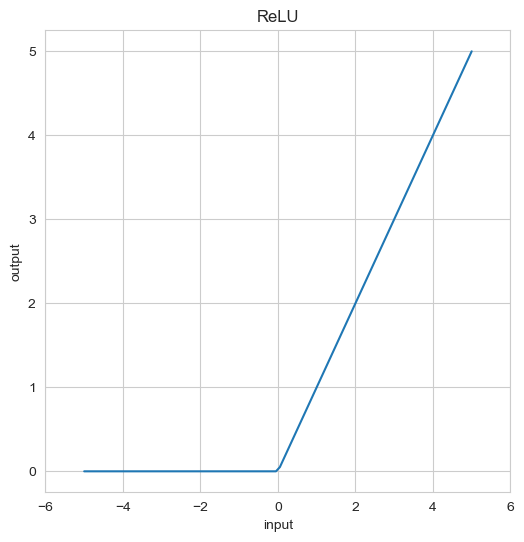

In [338]:
fig = plt.figure(figsize=(6, 6))
plt.title('ReLU')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), np.maximum(np.linspace(-5, 5, 100), 0))


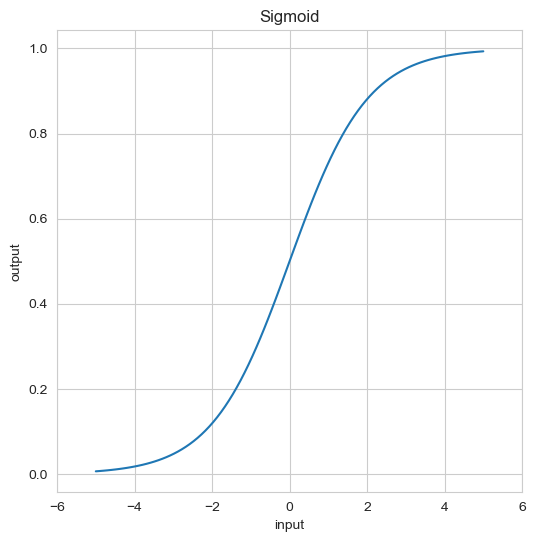

In [339]:
plt.figure(figsize=(6, 6))
plt.title('Sigmoid')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), 1 / (1 + np.exp(-np.linspace(-5, 5, 100))))


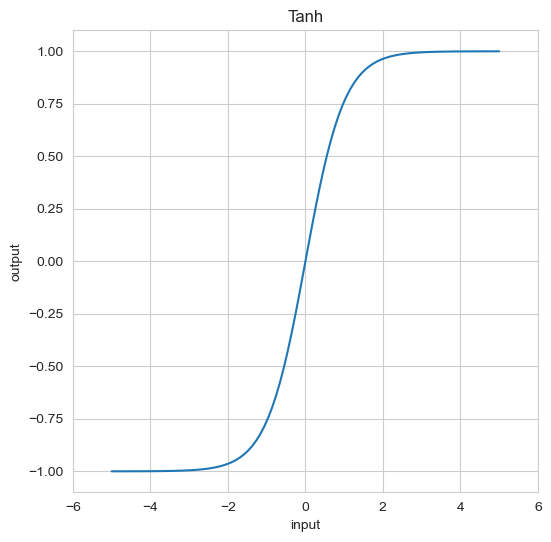

In [340]:
plt.figure(figsize=(6, 6))
plt.title('Tanh')
plt.xlim(-6, 6)
plt.xlabel('input')
plt.ylabel('output')
plt.plot(np.linspace(-5, 5, 100), np.tanh(np.linspace(-5, 5, 100)))

## Layers
There are many types of layers in PyTorch, such as:
- Linear
- Convolutional
- Recurrent
- Pooling
- Dropout
- BatchNorm
- Embedding

A layer has an input shape and an output shape.

For example, the following layer has an input shape of 2 and an output shape of 3:

```python
layer = nn.Linear(2, 3)
```

This layer has 3 neurons, each of which has 2 weights and 1 bias, and takes inout from a previous later with 2 inputs.



![3 neurons](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/3-2-node.png)

[A tool for drawing neural networks](https://alexlenail.me/NN-SVG/)

## Rerun the model with non-linear layers

![1-3-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/1-3-1.png)



In [341]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR2(nn.Module):
    def __init__(self):
        super(LR2, self).__init__()
        n_dense = 3
        self.layer1 = nn.Linear(1, n_dense)
        self.layer2 = nn.Linear(n_dense, 1)

    def forward(self, x):
        o1 = F.sigmoid(self.layer1(x))
        return self.layer2(o1)


model = LR2()
if torch.cuda.is_available():
    model.cuda()

# torch.nn.init.normal_(model.linear.weight)

epochs = 20_001
loss_function = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 19313.54296875
epoch 50, loss 2843.22900390625
epoch 100, loss 2024.24853515625
epoch 150, loss 1647.2786865234375
epoch 200, loss 1492.2218017578125
epoch 250, loss 1391.0931396484375
epoch 300, loss 1333.248291015625
epoch 350, loss 1289.9620361328125
epoch 400, loss 1265.595703125
epoch 450, loss 1249.5626220703125
epoch 500, loss 1238.5081787109375
epoch 550, loss 1230.5379638671875
epoch 600, loss 1224.4498291015625
epoch 650, loss 1219.5650634765625
epoch 700, loss 1215.525390625
epoch 750, loss 1212.1239013671875
epoch 800, loss 1209.2235107421875
epoch 850, loss 1206.722412109375
epoch 900, loss 1204.5413818359375
epoch 950, loss 1202.6185302734375
epoch 1000, loss 1200.9056396484375
epoch 1050, loss 1199.3651123046875
epoch 1100, loss 1197.96923828125
epoch 1150, loss 1196.69580078125
epoch 1200, loss 1195.527587890625
epoch 1250, loss 1194.4515380859375
epoch 1300, loss 1193.45556640625
epoch 1350, loss 1192.5311279296875
epoch 1400, loss 1191.6702880859375
epoc

epoch 11950, loss 1176.0311279296875
epoch 12000, loss 1176.0340576171875
epoch 12050, loss 1176.0369873046875
epoch 12100, loss 1176.0399169921875
epoch 12150, loss 1176.04296875
epoch 12200, loss 1176.0457763671875
epoch 12250, loss 1176.048828125
epoch 12300, loss 1176.0516357421875
epoch 12350, loss 1176.0546875
epoch 12400, loss 1176.0577392578125
epoch 12450, loss 1176.060791015625
epoch 12500, loss 1176.0634765625
epoch 12550, loss 1176.0665283203125
epoch 12600, loss 1176.0697021484375
epoch 12650, loss 1176.072509765625
epoch 12700, loss 1176.07568359375
epoch 12750, loss 1176.078857421875
epoch 12800, loss 1176.08154296875
epoch 12850, loss 1176.084716796875
epoch 12900, loss 1176.087646484375
epoch 12950, loss 1176.090576171875
epoch 13000, loss 1176.0933837890625
epoch 13050, loss 1176.0965576171875
epoch 13100, loss 1176.099365234375
epoch 13150, loss 1176.1025390625
epoch 13200, loss 1176.1055908203125
epoch 13250, loss 1176.1085205078125
epoch 13300, loss 1176.1114501953

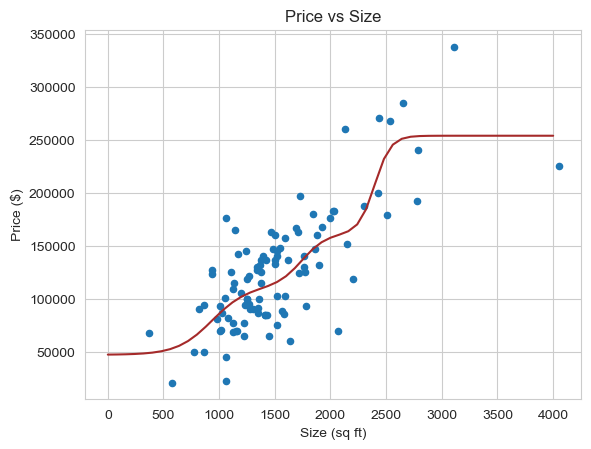

In [342]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')

## Bigger and Better?

![1-32-32-32-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/1-32-32-32-1.png)

385 nodes, 32896 edges (32896 weights, 385 biases)


In [ ]:

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

x_train = (data['size'].values / 1000.).astype(np.float32)
y_train = (data['price'].values / 1000.).astype(np.float32)


class LR2(nn.Module):
    def __init__(self):
        super(LR2, self).__init__()
        n_depth = 128
        self.layer1 = nn.Linear(1, n_depth)
        self.layer2 = nn.Linear(n_depth, n_depth)
        self.layer3 = nn.Linear(n_depth, 1)

    def forward(self, x):
        o1 = F.sigmoid(self.layer1(x))
        o2 = F.sigmoid(self.layer2(o1))
        return self.layer3(o2)


model = LR2()
if torch.cuda.is_available():
    model.cuda()

# torch.nn.init.normal_(model.linear.weight)

epochs = 30_001
loss_function = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

inputs = Variable(torch.from_numpy(x_train)).reshape(-1, 1).to(dev)
labels = Variable(torch.from_numpy(y_train)).reshape(-1, 1).to(dev)

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(inputs)
    loss = loss_function(Y_hat, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
plot_points()

test_inputs = np.linspace(0, 4, 51, dtype=np.float32)

input_tensor = Variable(torch.from_numpy(test_inputs)).to(dev)

with torch.no_grad():
    output_tensor = model(input_tensor.reshape(-1, 1))

test_outputs = output_tensor.to('cpu').numpy().reshape(-1)

plt.plot(test_inputs * 1000, test_outputs * 1000, color='brown')

# Building a price prediction model with three inputs

## Prepare the data

In [ ]:
# identify the data
sizes= data['size'].values.astype(np.float32)/1000.
lots= data['lot'].values.astype(np.float32)/1000.
taxes= data['Taxes'].values.astype(np.float32)/1000.
y= data['price'].values.astype(np.float32)/1000.
print(sizes[:10])
print(lots[:10])
print(taxes[:10])

# combine the data
x = np.stack((sizes, lots, taxes), axis=1)
print(x[:10])

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train[:10])

# convert to tensors
x_train = torch.from_numpy(x_train).to(dev)
x_test = torch.from_numpy(x_test).to(dev)
y_train = torch.from_numpy(y_train).reshape(-1, 1).to(dev)
y_test = torch.from_numpy(y_test).reshape(-1, 1).to(dev)



## Design & Build the model

![3-3-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/3-3-1.png)


In [ ]:
# Build the model
import torch
import torch.nn as nn
import torch.nn.functional as F

class LR3(nn.Module):
    def __init__(self):
        super(LR3, self).__init__()
        n_depth = 3
        self.layer1 = nn.Linear(3, n_depth)
        self.layer2 = nn.Linear(n_depth, n_depth)
        self.layer_o = nn.Linear(n_depth, 1)

    def forward(self, x):
        x = F.sigmoid(self.layer1(x))
        x = F.sigmoid(self.layer2(x))
        return self.layer_o(x)

model = LR3()
if torch.cuda.is_available():
    model.cuda()

## Train the model

In [ ]:
# Train the model
epochs = 3000
loss_function = torch.nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

for epoch in range(epochs):
    optimizer.zero_grad()

    Y_hat = model(x_train)
    loss = loss_function(Y_hat, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

[Why 0.9?](https://towardsdatascience.com/why-0-9-towards-better-momentum-strategies-in-deep-learning-827408503650#:~:text=Momentum%20is%20a%20widely%2Dused,in%20directions%20of%20high%20curvature)

# Test the model

In [ ]:
# Test the model
with torch.no_grad():
    Y_hat = model(x_test)
    loss = loss_function(Y_hat, y_test)
    print('loss {}'.format(loss.item()))

# Classification

XNOR

| A | B | Result |
|---|---|--------|
| 0 | 0 | 1      |
| 0 | 1 | 0      |
| 1 | 0 | 0      |
| 1 | 1 | 1      |



In [ ]:
plt.plot(0, 0, 'o', color='green')
plt.plot(0, 1, 'o', color='red')
plt.plot(1, 0, 'o', color='red')
plt.plot(1, 1, 'o', color='green')


### Prepare the data


In [ ]:
import numpy as np

x_0 = np.random.randint(0, 2, 1600).astype(np.float32)
x_1 = np.random.randint(0, 2, 1600).astype(np.float32)
y = np.array([1 if x_0[i] == x_1[i] else 0 for i in range(len(x_0))]).astype(np.float32)
print(f'x_0: {x_0[:10]}')
print(f'x_1: {x_1[:10]}')
print(f'y  : {y[:10]}')

inputs = np.array([x_0, x_1]).T


x_train, x_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2)

### Design the Model

![2-2-1](https://raw.githubusercontent.com/tbenbrahim/deep-learning-lunch-and-learn/main/images/2-2-1.png)


In [ ]:
class XNOR(nn.Module):
    def __init__(self, debug=False):
        super(XNOR, self).__init__()
        n_depth = 2
        self.layer1 = nn.Linear(2, n_depth)
        self.layer2 = nn.Linear(n_depth, 1)
        self.debug = debug

    def forward(self, x):
        o1 = torch.sigmoid(self.layer1(x))
        o2 = self.layer2(o1)
        if self.debug:
            print(f'x: {x} o1: {o1} o2: {o2}')
        return o2


xnor_model = XNOR()


### Train the Model


In [ ]:
learning_rate = 0.1
epochs = 100_000
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(xnor_model.parameters(), lr=learning_rate, momentum=0.9)

inputs = Variable(torch.from_numpy(x_train))
labels = Variable(torch.from_numpy(y_train))

last_loss = sys.float_info.max

for epoch in range(epochs + 1):
    optimizer.zero_grad()

    Y_hat = xnor_model(inputs)
    loss = loss_function(Y_hat, labels.reshape(-1, 1))
    loss.backward()
    optimizer.step()

    if (epoch % 50) == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

    if last_loss == loss.item():
        print('epoch {}, loss {}'.format(epoch, loss.item()))
        break
    last_loss = loss.item()


### Test the Model

In [ ]:
inputs = Variable(torch.from_numpy(x_test))
labels = Variable(torch.from_numpy(y_test))

with torch.no_grad():
    Y_hat = xnor_model(inputs)
    # print('Y_hat {}'.format(Y_hat))
    loss = loss_function(Y_hat, labels.reshape(-1, 1))
    print('loss {}'.format(loss.item()))
